Heavily inspired by https://python.nicolasbarrier.fr/misc/nemo.html

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import cartopy

In [2]:
mesh = xr.open_dataset(
    "/home/jovyan/shared_materials/model_data/mask/VIKING20X.L46-KKG36107B/mesh_mask.nc",
).squeeze()

depth = mesh.e3t_0.where(mesh.tmask).sum("z")
depth = depth.assign_coords(
    lon=mesh.glamt, lat=mesh.gphit,
)
depth = depth.where(mesh.tmaskutil, drop=True)
depth

<xarray.DataArray 'e3t_0' (y: 1019, x: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lon      (y, x) float32 ...
    lat      (y, x) float32 ...
Dimensions without coordinates: y, x

In [3]:
depth_arr = depth.transpose("y", "x").fillna(-1).data  # later, we won't be able to handle nan in the contour plot
lon_arr = depth.transpose("y", "x").lon.data
lat_arr = depth.transpose("y", "x").lat.data

In [4]:
projin = cartopy.crs.PlateCarree()
projout = cartopy.crs.PlateCarree(central_longitude=0)

In [5]:
lon_lat_z = projout.transform_points(
    projin,
    lon_arr.flatten()[~np.isnan(depth_arr.flatten())],
    lat_arr.flatten()[~np.isnan(depth_arr.flatten())],
    depth_arr.flatten()[~np.isnan(depth_arr.flatten())],
)
lon_proj = lon_lat_z[:, 0]
lat_proj = lon_lat_z[:, 1]
depth_proj = lon_lat_z[:, 2]

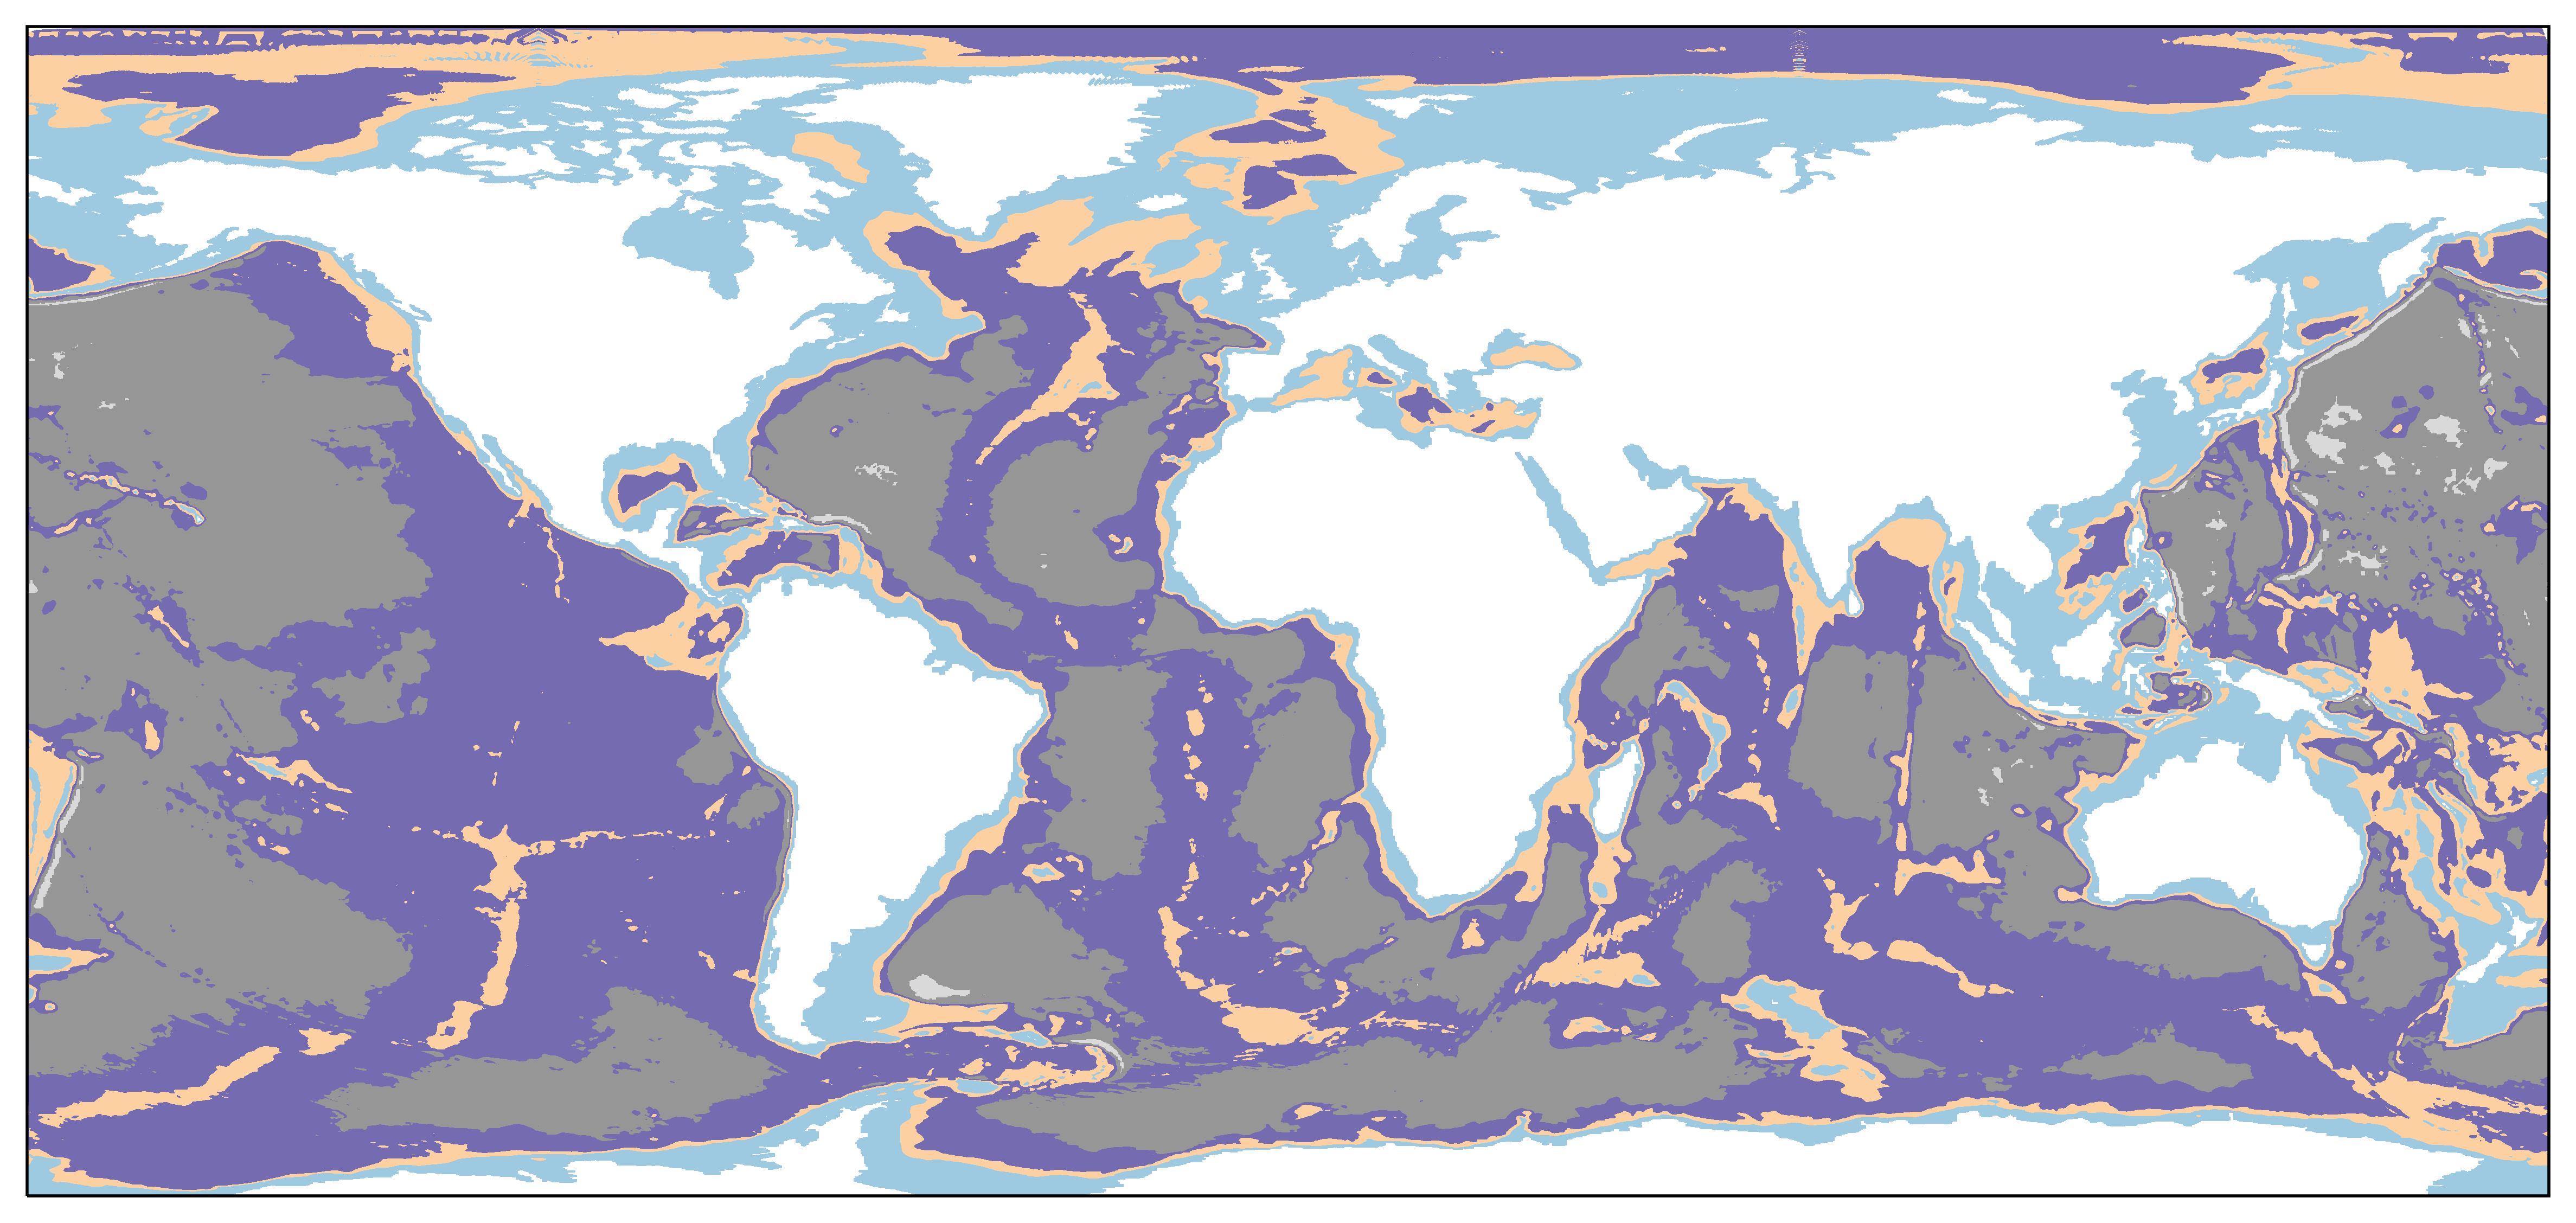

In [6]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": projout}, figsize=(12, 12))
fig.set_dpi(500)
ax.tricontourf(lon_proj, lat_proj, depth_proj, levels=np.linspace(0, 6000, 5), extend="max", cmap="tab20c")

/tmp/ipykernel_3596/2547298111.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.pcolormesh(lon_arr % 360.0, lat_arr, depth_arr / (depth_arr >= 0), vmin=0, vmax=6000, rasterized=True, transform=projin)


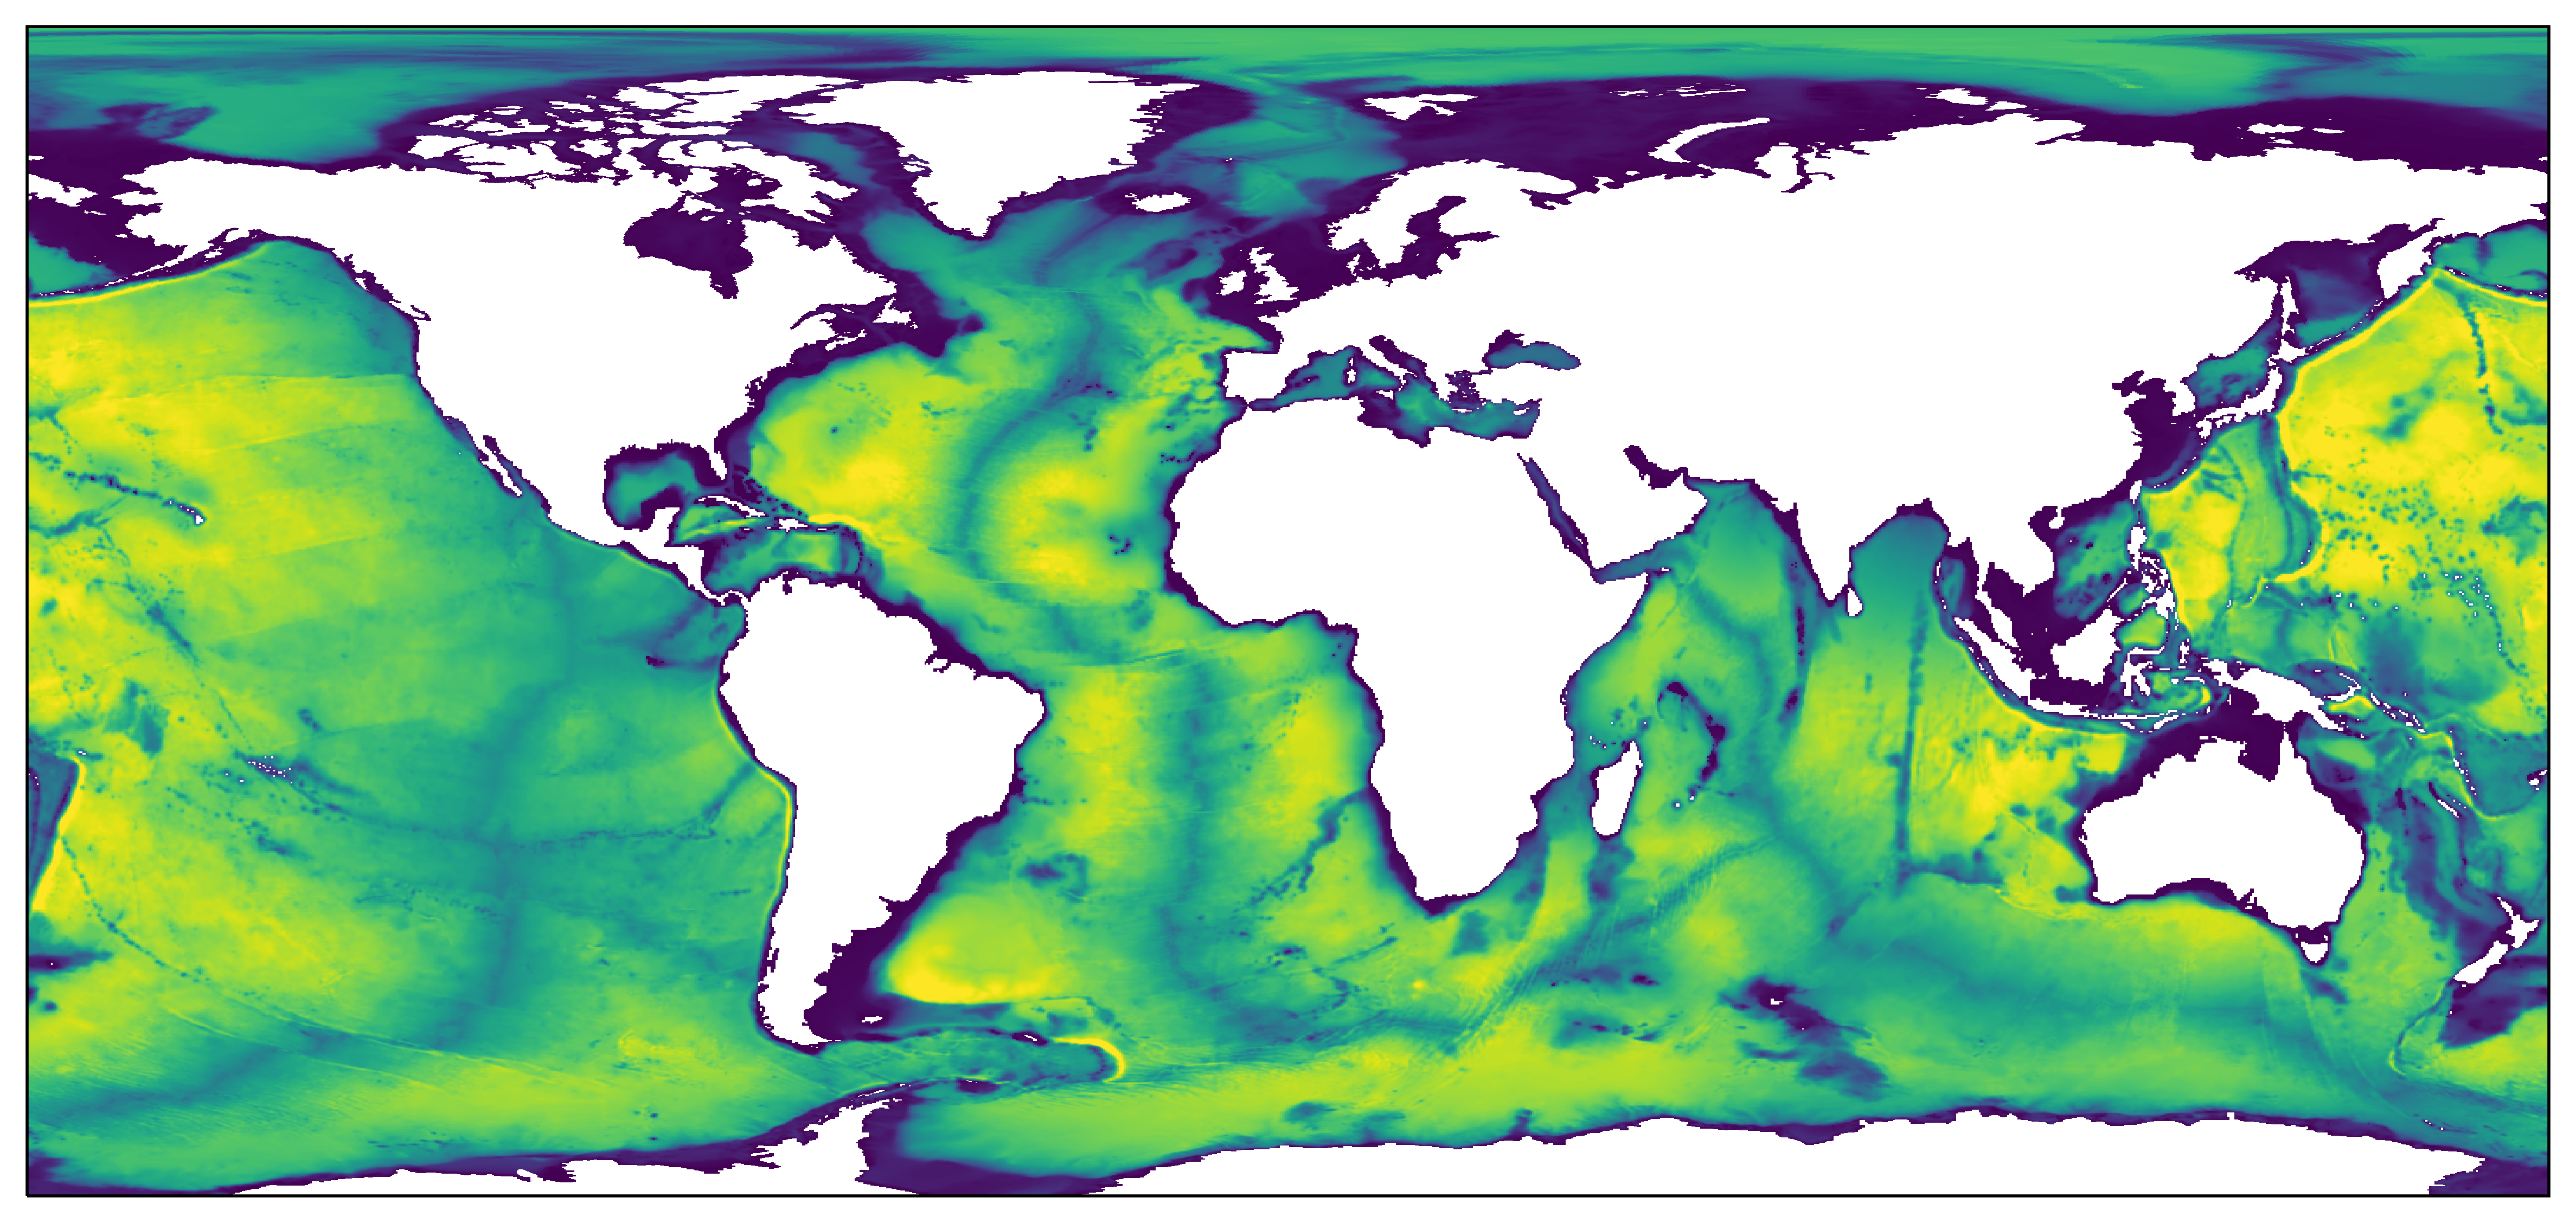

In [7]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": projout}, figsize=(12, 12))
fig.set_dpi(500)
ax.pcolormesh(lon_arr % 360.0, lat_arr, depth_arr / (depth_arr >= 0), vmin=0, vmax=6000, rasterized=True, transform=projin)

In [8]:
projin = cartopy.crs.PlateCarree()
projout = cartopy.crs.Mollweide(central_longitude=-123)

In [9]:
lon_lat_z = projout.transform_points(
    projin,
    lon_arr.flatten()[~np.isnan(depth_arr.flatten())],
    lat_arr.flatten()[~np.isnan(depth_arr.flatten())],
    depth_arr.flatten()[~np.isnan(depth_arr.flatten())],
)
lon_proj = lon_lat_z[:, 0]
lat_proj = lon_lat_z[:, 1]
depth_proj = lon_lat_z[:, 2]

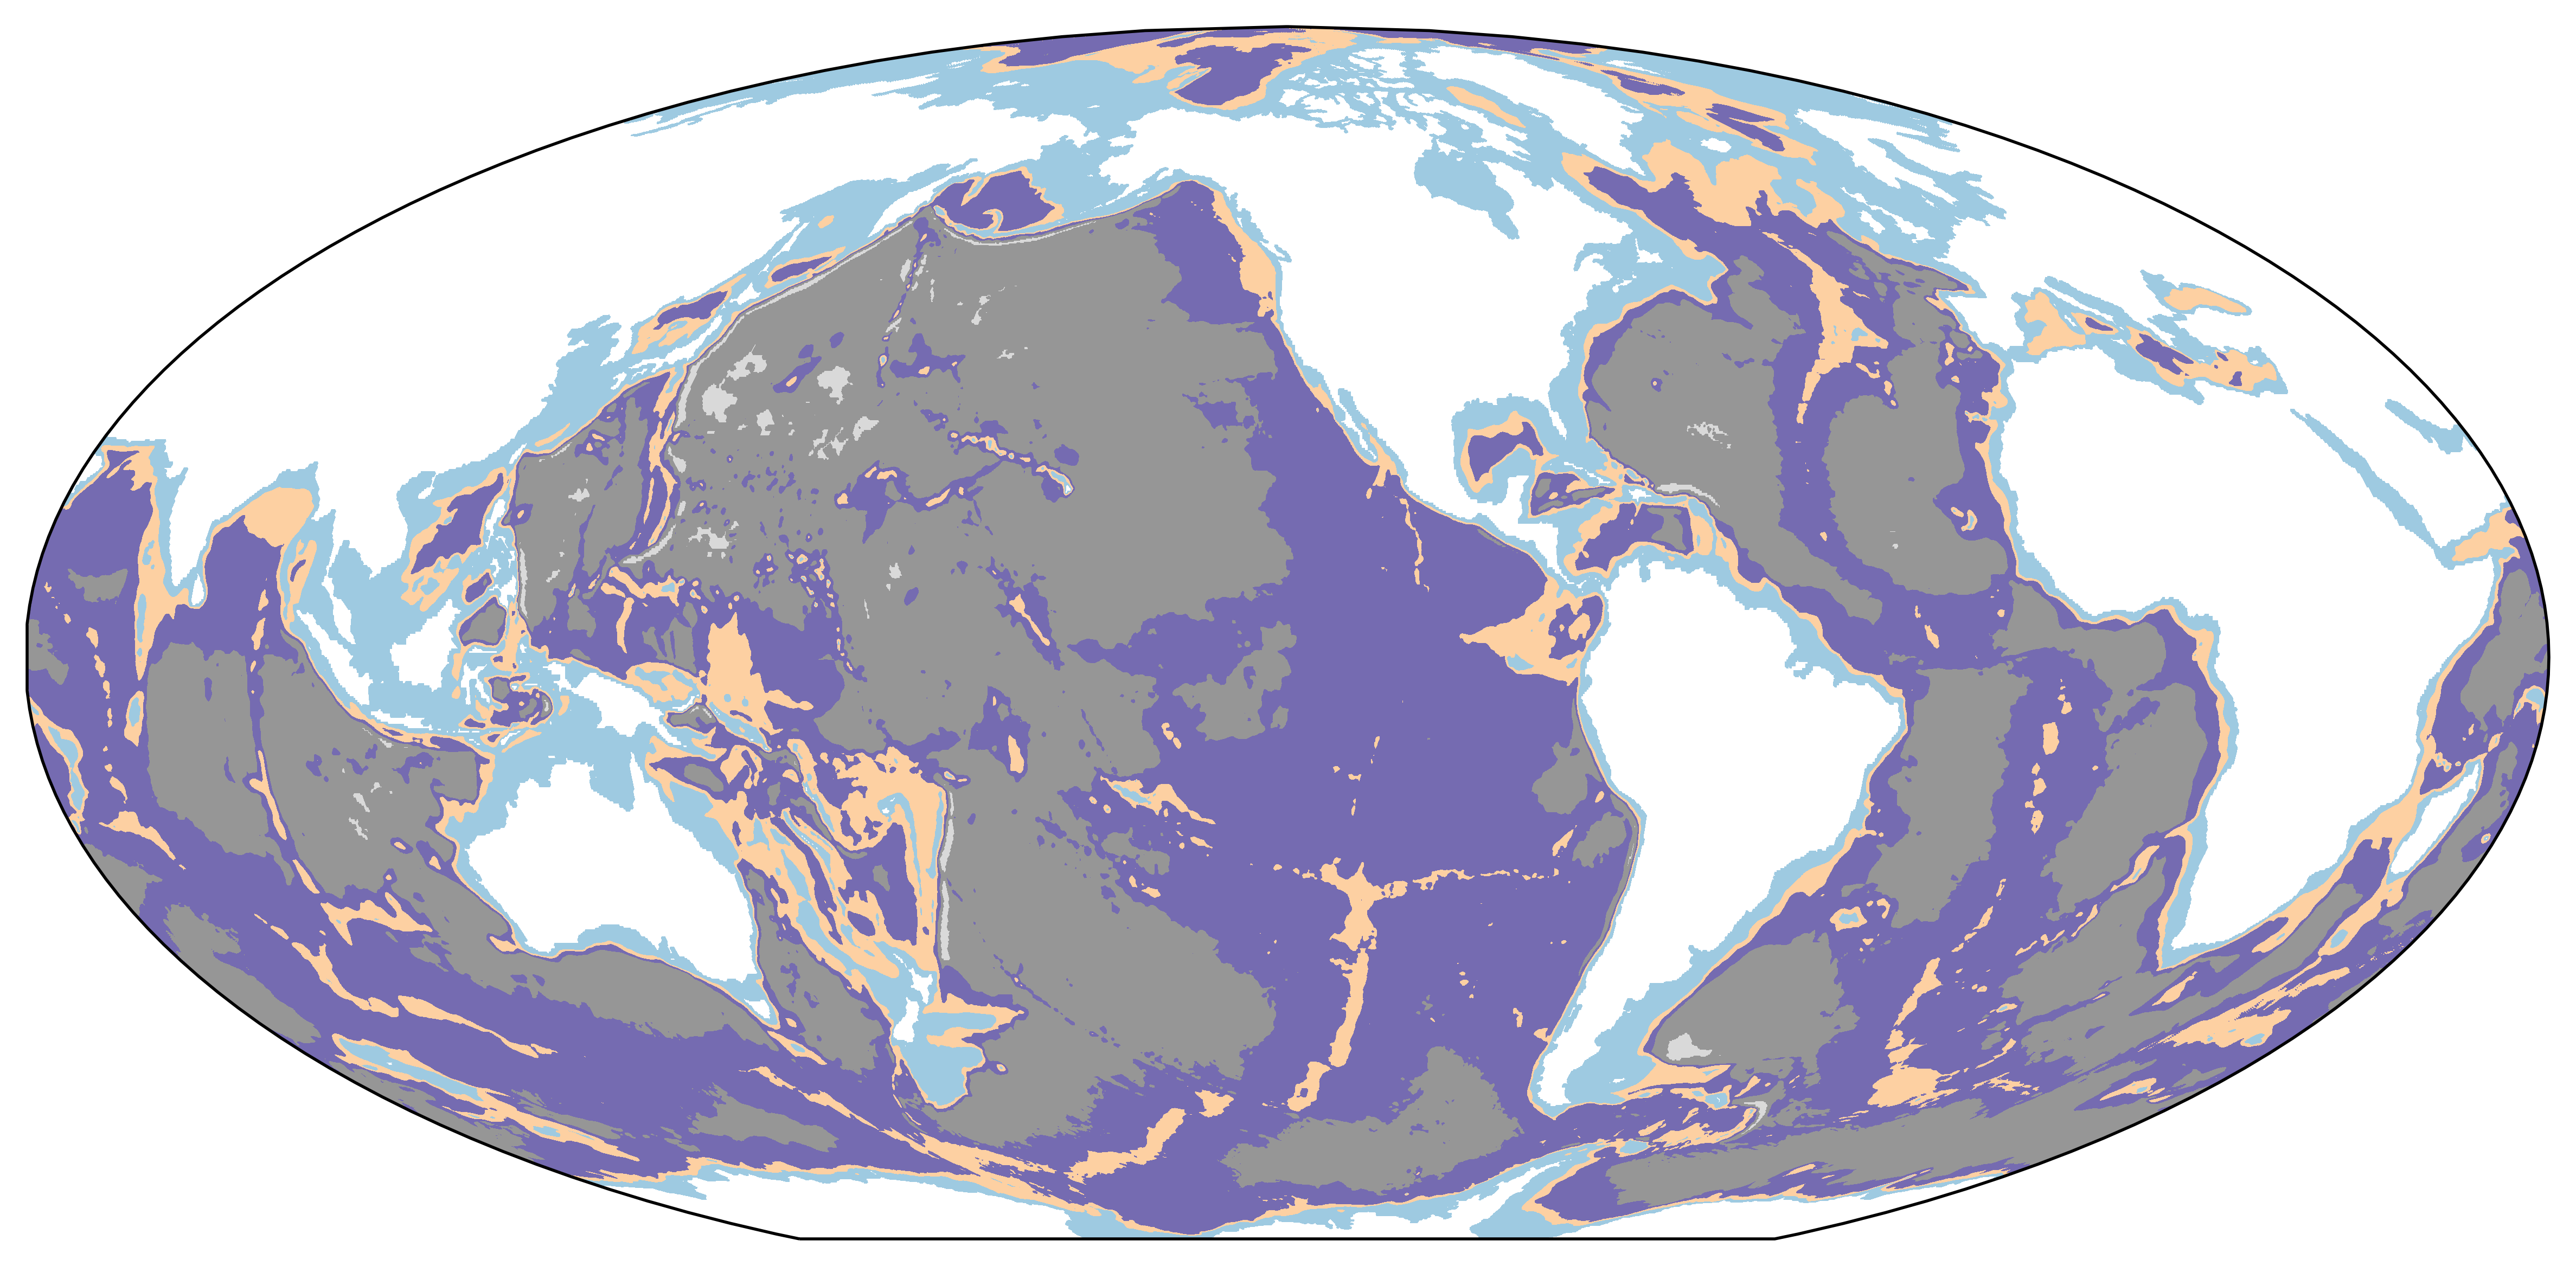

In [10]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": projout}, figsize=(12, 12))
fig.set_dpi(500)
ax.tricontourf(lon_proj, lat_proj, depth_proj, levels=np.linspace(0, 6000, 5), extend="max", cmap="tab20c")

/tmp/ipykernel_3596/2547298111.py:3: RuntimeWarning: divide by zero encountered in divide
  ax.pcolormesh(lon_arr % 360.0, lat_arr, depth_arr / (depth_arr >= 0), vmin=0, vmax=6000, rasterized=True, transform=projin)


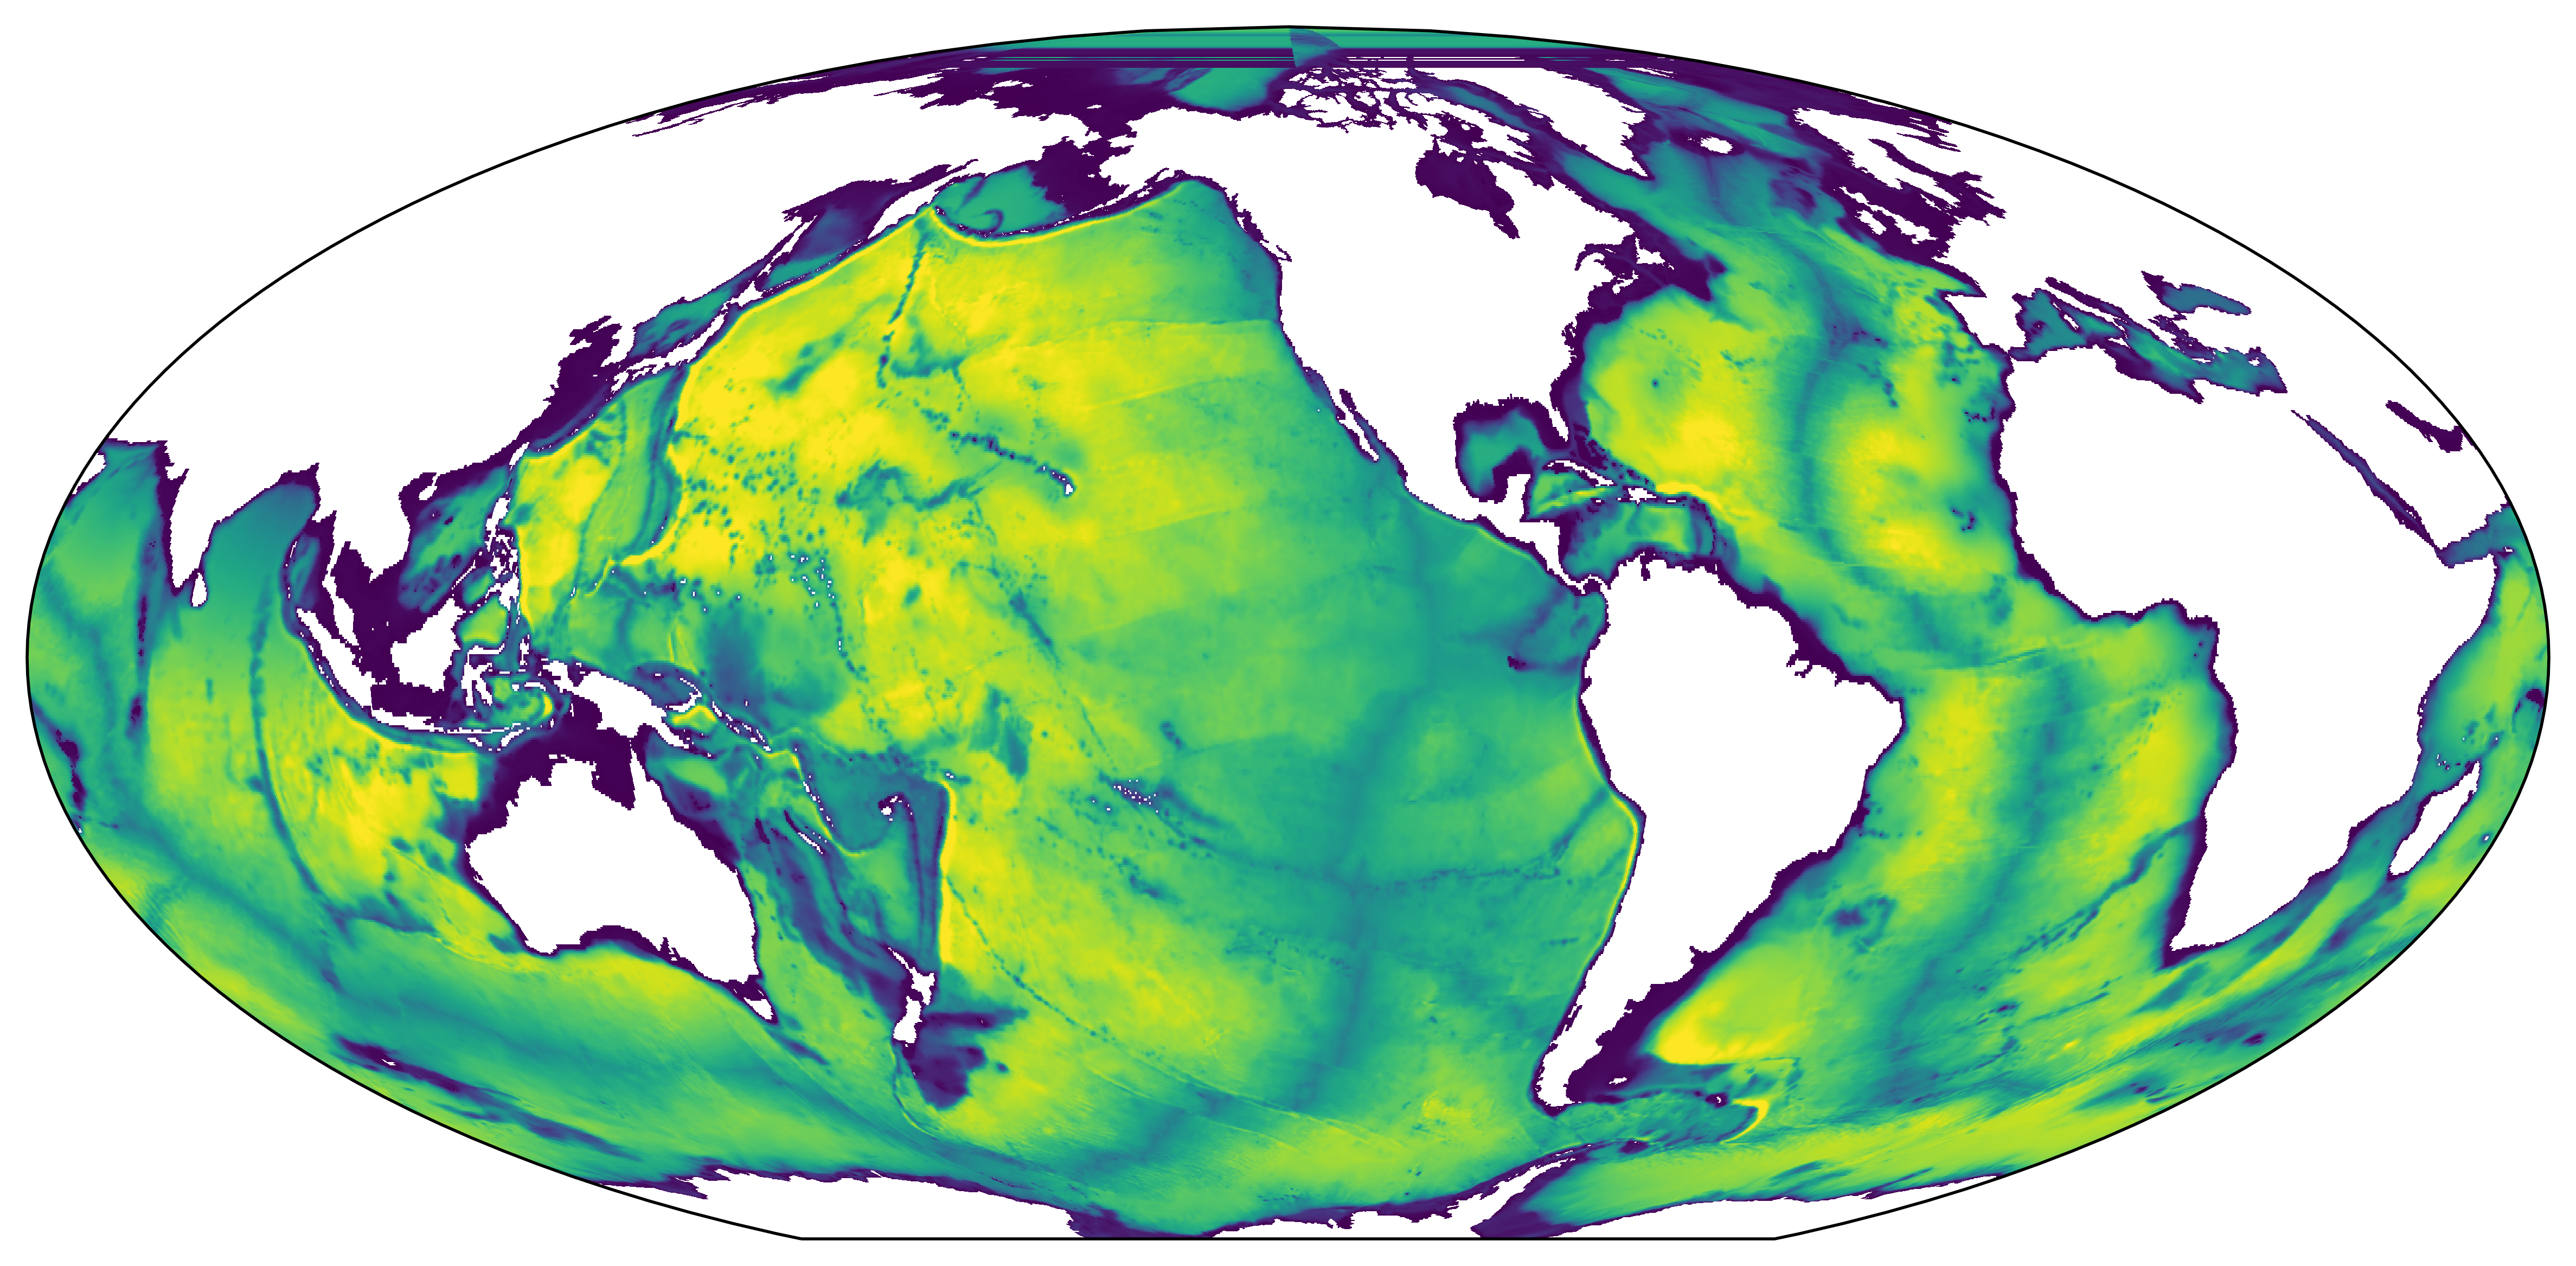

In [11]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": projout}, figsize=(12, 12))
fig.set_dpi(500)
ax.pcolormesh(lon_arr % 360.0, lat_arr, depth_arr / (depth_arr >= 0), vmin=0, vmax=6000, rasterized=True, transform=projin)